###### Tez Projesi Çalışması
###### Çetin KAYA
###### 210904012

# **ÇALIŞAN DÖNÜŞÜM HIZI TAHMİNLEME**#
Giriş
Bu araştırma yıpranmaya bağlı olarak çalışan devir hızının tahminlenmesi ve buna neden faktörlerin ortaya çıkarılmasını amaçlamaktadır.
Kaggle uygulamasından seçilen veri seti üzerinden çeşitli makine öğrenmesi yöntemleri uygulanarak analizler yapılacaktır. Devamında oluşan öğretilen model ile oluşan sonuçlar test edilecektir.

 Çalışan devri ("çalışan kaybı" olarak da bilinir) şirketler için maliyetli bir sorundur. Bir çalışanı değiştirmenin gerçek maliyeti genellikle oldukça yüksek olabilir. Center for American Progress tarafından yapılan bir araştırma, şirketlerin bir çalışanı değiştirmek için genellikle o çalışanın maaşının yaklaşık beşte birini ödediğini ve yöneticiler veya en yüksek maaşlı çalışanlar değiştirilecekse maliyetin önemli ölçüde artabileceğini ortaya koymuştur. Başka bir deyişle, çoğu işveren için çalışanlarını değiştirmenin maliyeti önemli olmaya devam etmektedir. Bunun nedeni, mülakat yapmak ve yerine birini bulmak için harcanan zaman, işe başlama ikramiyeleri ve yeni çalışan yeni rolüne alışırken birkaç ay boyunca yaşanan üretkenlik kaybıdır.



Veri setini "https://www.kaggle.com/code/hamzaben/employee-churn-model-w-strategic-retention-plan" adresinden bulabilirsiniz.


## 1. Veri Setinin Hazırlanması
Veri temizleme ve hazırlama işlemleri veri üzerinde uygun bir analiz yapmak için oldukça önemli bir adımdır. Veri seti kaynağından alınarak düzgün bir formatta proje ortamına aktırılması için hazırlandı. Çalışma ortamı kuruldu.

## 2. Verilerin Alınması

Stratejik Elde Tutma Planı ile Çalışan Kaybı Modeli: Bir İK Analitiği Vaka Çalışması bilgilerini içeren veri seti alınır .

In [3]:
import pandas as pd
from notebooks.utils import *
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel(r'D:\Projects\tez_calisma\data\Tez_Datasi.xlsx')
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## 3. Verinin Temizlenmesi
Veri üzerinde düzenleme yapmak için aşağıdaki işlemler yapılmıştır.
   * Eksik veri analizinin yapılması
   * Değişken yapıları incelenmiştir.
   * Değişken tipleri incelenmiştir.
   * Tip dönüşümleri yapılmıştır.(Kategorik değişken tipleri object iken float tipe dönüştürülmüştür.)
   * Kategorik olan değişkenler dikey sütün halinde ve yatay sütün haline getirilerek encoding uygulanmıştır.(0,1)
   * Veriye max min scaler uygulanarak outler olan değerlere 0.5 aralığında bir değerler atanarak aralık daratılmıştır.
   * Attration(yıpranma) değerlerindeki dengesizlik için unbalasing metodlar uygulanarak "Evet" sayıları yükseltilmiştir.

#### DEĞİŞKEN YAPILARININ İNCELENMESİ ####

In [5]:
cat_cols, num_cols, cat_but_car = grap_col_names(df)

Observations: 1470
Variables: 35
cat_cols: 9
num_cols: 26
cat_but_car: 0
num_but_cat: 0


In [6]:
print("\n##################### CATEGORIC #####################")
print(cat_cols)

print("\n##################### NUMERIC#####################")
print(num_cols)

print("\n##################### CARDINAL #####################")
print(cat_but_car)

print("\n##################### CLASS COUNT #####################")
df[cat_cols].nunique()


##################### CATEGORIC #####################
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

##################### NUMERIC#####################
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

##################### CARDINAL #####################
[]

##################### CLASS COUNT #####################


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [7]:
check_df(df)


##################### SHAPE #####################
(1470, 35)

##################### TYPES #####################
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
Relationship

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## 4. Keşifsel Veri Analizi

### Verinin Görselleştirilmesi

Veri temizlenip işlendikten sonra görsel verilerin oluşturulacağı veri setleri oluşturulmuştur. Bu veri setleri kullanılarak aşağıdaki görsellere yer verilmiştir.

        Gender  Ration
Male       882    60.0
Female     588    40.0
##########################################



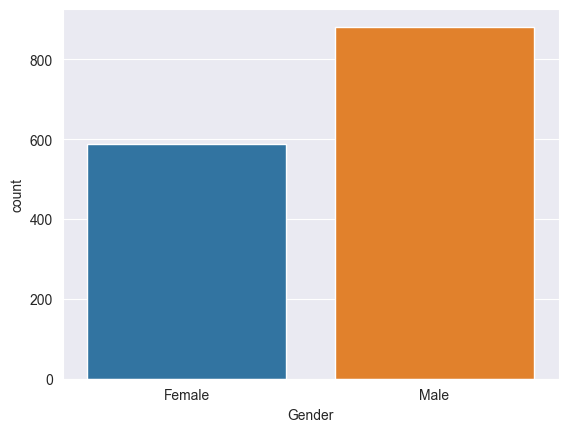

                  EducationField     Ration
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735
##########################################



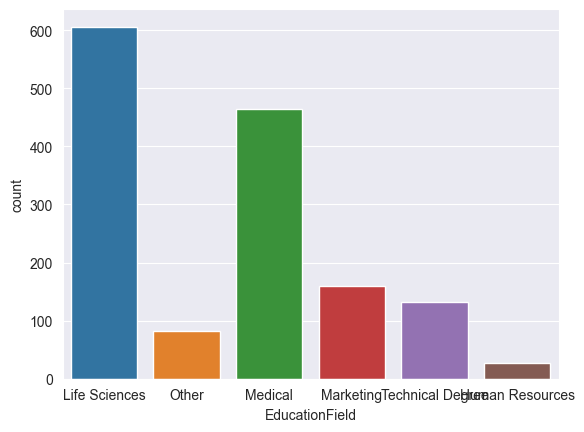

In [10]:
cat_summary(df, "Gender" ,True)
cat_summary(df, "EducationField" ,True)

     Attrition     Ration
No        1233  83.877551
Yes        237  16.122449
##########################################



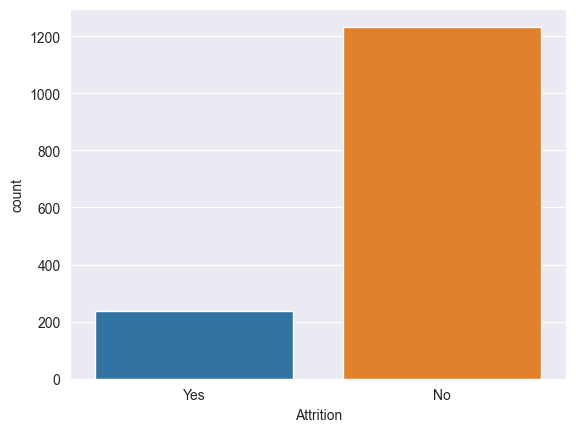

                   BusinessTravel     Ration
Travel_Rarely                1043  70.952381
Travel_Frequently             277  18.843537
Non-Travel                    150  10.204082
##########################################



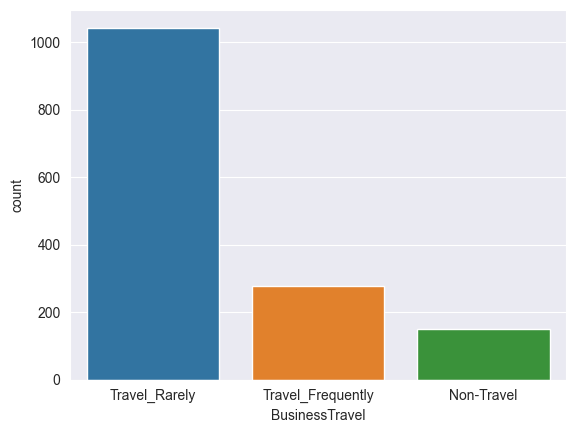

                        Department     Ration
Research & Development         961  65.374150
Sales                          446  30.340136
Human Resources                 63   4.285714
##########################################



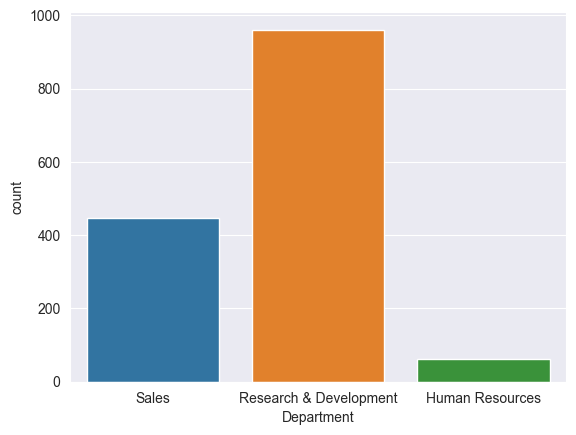

                  EducationField     Ration
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735
##########################################



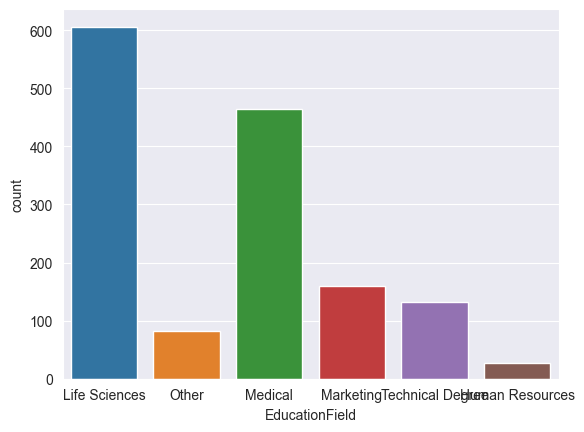

        Gender  Ration
Male       882    60.0
Female     588    40.0
##########################################



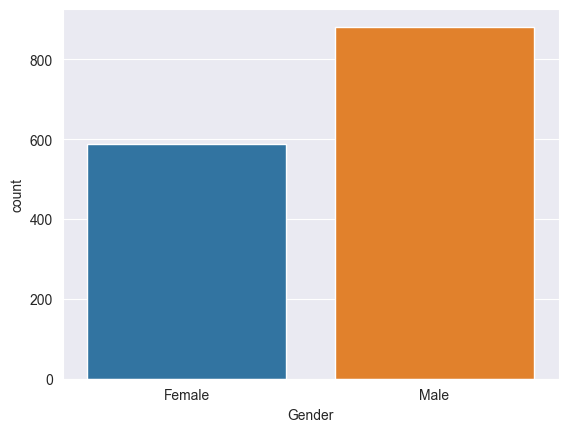

                           JobRole     Ration
Sales Executive                326  22.176871
Research Scientist             292  19.863946
Laboratory Technician          259  17.619048
Manufacturing Director         145   9.863946
Healthcare Representative      131   8.911565
Manager                        102   6.938776
Sales Representative            83   5.646259
Research Director               80   5.442177
Human Resources                 52   3.537415
##########################################



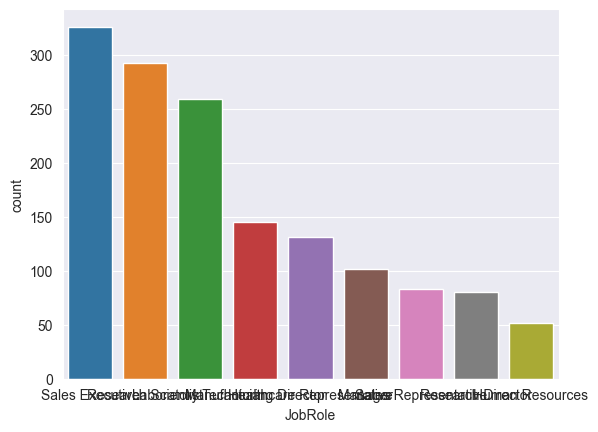

          MaritalStatus     Ration
Married             673  45.782313
Single              470  31.972789
Divorced            327  22.244898
##########################################



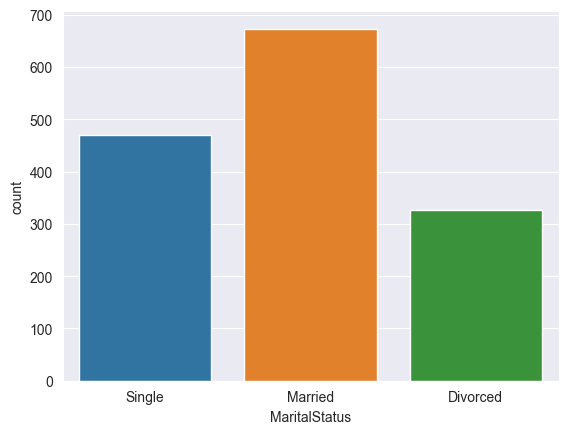

   Over18  Ration
Y    1470   100.0
##########################################



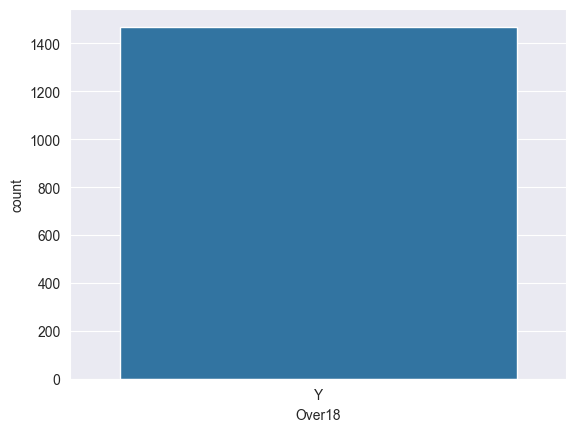

     OverTime    Ration
No       1054  71.70068
Yes       416  28.29932
##########################################



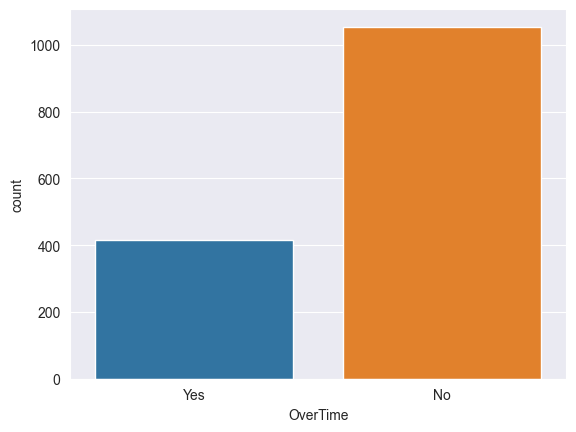

In [11]:
df_cat = df[cat_cols]
for col in df_cat.columns:
    cat_summary(df_cat, col ,True)

## Değişkenlerin LabelEncoding ile Dönüştürülmesi(kategorik verileri sayısal verilere dönüştürelim

#### (Sales Dep, Research Dep ==> 2, 3 gibi )

In [14]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [16]:
# değişkenler dikeyde kalır(0, 1, 2, 3,4 gibi)
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

9 columns were label encoded.


In [17]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
# convert rest of categorical variable into dummy
df= pd.get_dummies(df, drop_first=True)

## Scaling the data with MinMaxScaler

In [19]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.738095,1.0,5.0,3.579098,5.0,0.000000,1.25,1.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588
1,3.690476,0.0,2.5,0.633500,2.5,1.250000,0.00,1.0,0.0,0.002419,...,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824
2,2.261905,1.0,5.0,4.549034,2.5,0.178571,1.25,4.0,0.0,0.007257,...,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000
3,1.785714,0.0,2.5,4.617037,2.5,0.357143,3.75,1.0,0.0,0.009676,...,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000
4,1.071429,0.0,5.0,1.750179,2.5,0.178571,0.00,3.0,0.0,0.014514,...,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235


In [20]:

df.dtypes

Age                         float64
Attrition                   float32
BusinessTravel              float64
DailyRate                   float64
Department                  float64
DistanceFromHome            float64
Education                   float64
EducationField              float64
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                      float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                     float64
JobSatisfaction             float64
MaritalStatus               float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                      float64
OverTime                    float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            

In [21]:
df.dtypes

Age                         float64
Attrition                   float32
BusinessTravel              float64
DailyRate                   float64
Department                  float64
DistanceFromHome            float64
Education                   float64
EducationField              float64
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                      float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                     float64
JobSatisfaction             float64
MaritalStatus               float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                      float64
OverTime                    float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            

## Imbalance data check and resampling the attrition "yes" data

In [22]:
#imbalanced data control
df['Attrition'].value_counts()
#The class in an imbalanced classification predictive modeling problem that has slightly more examples.
#thus, there is no imbalanced data problem, but we can add some sampling in data get equal sample

0.0    1233
1.0     237
Name: Attrition, dtype: int64

## Upsampling the Data

In [23]:
from sklearn.utils import resample
df1 = df.copy()
#create two different dataframe of majority and minority class
df_majority = df1[(df1['Attrition']==0)]
df_minority = df1[(df1['Attrition']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1233, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled.reset_index(drop = True, inplace = True)
df_upsampled.head()
df = df_upsampled

<Axes: >

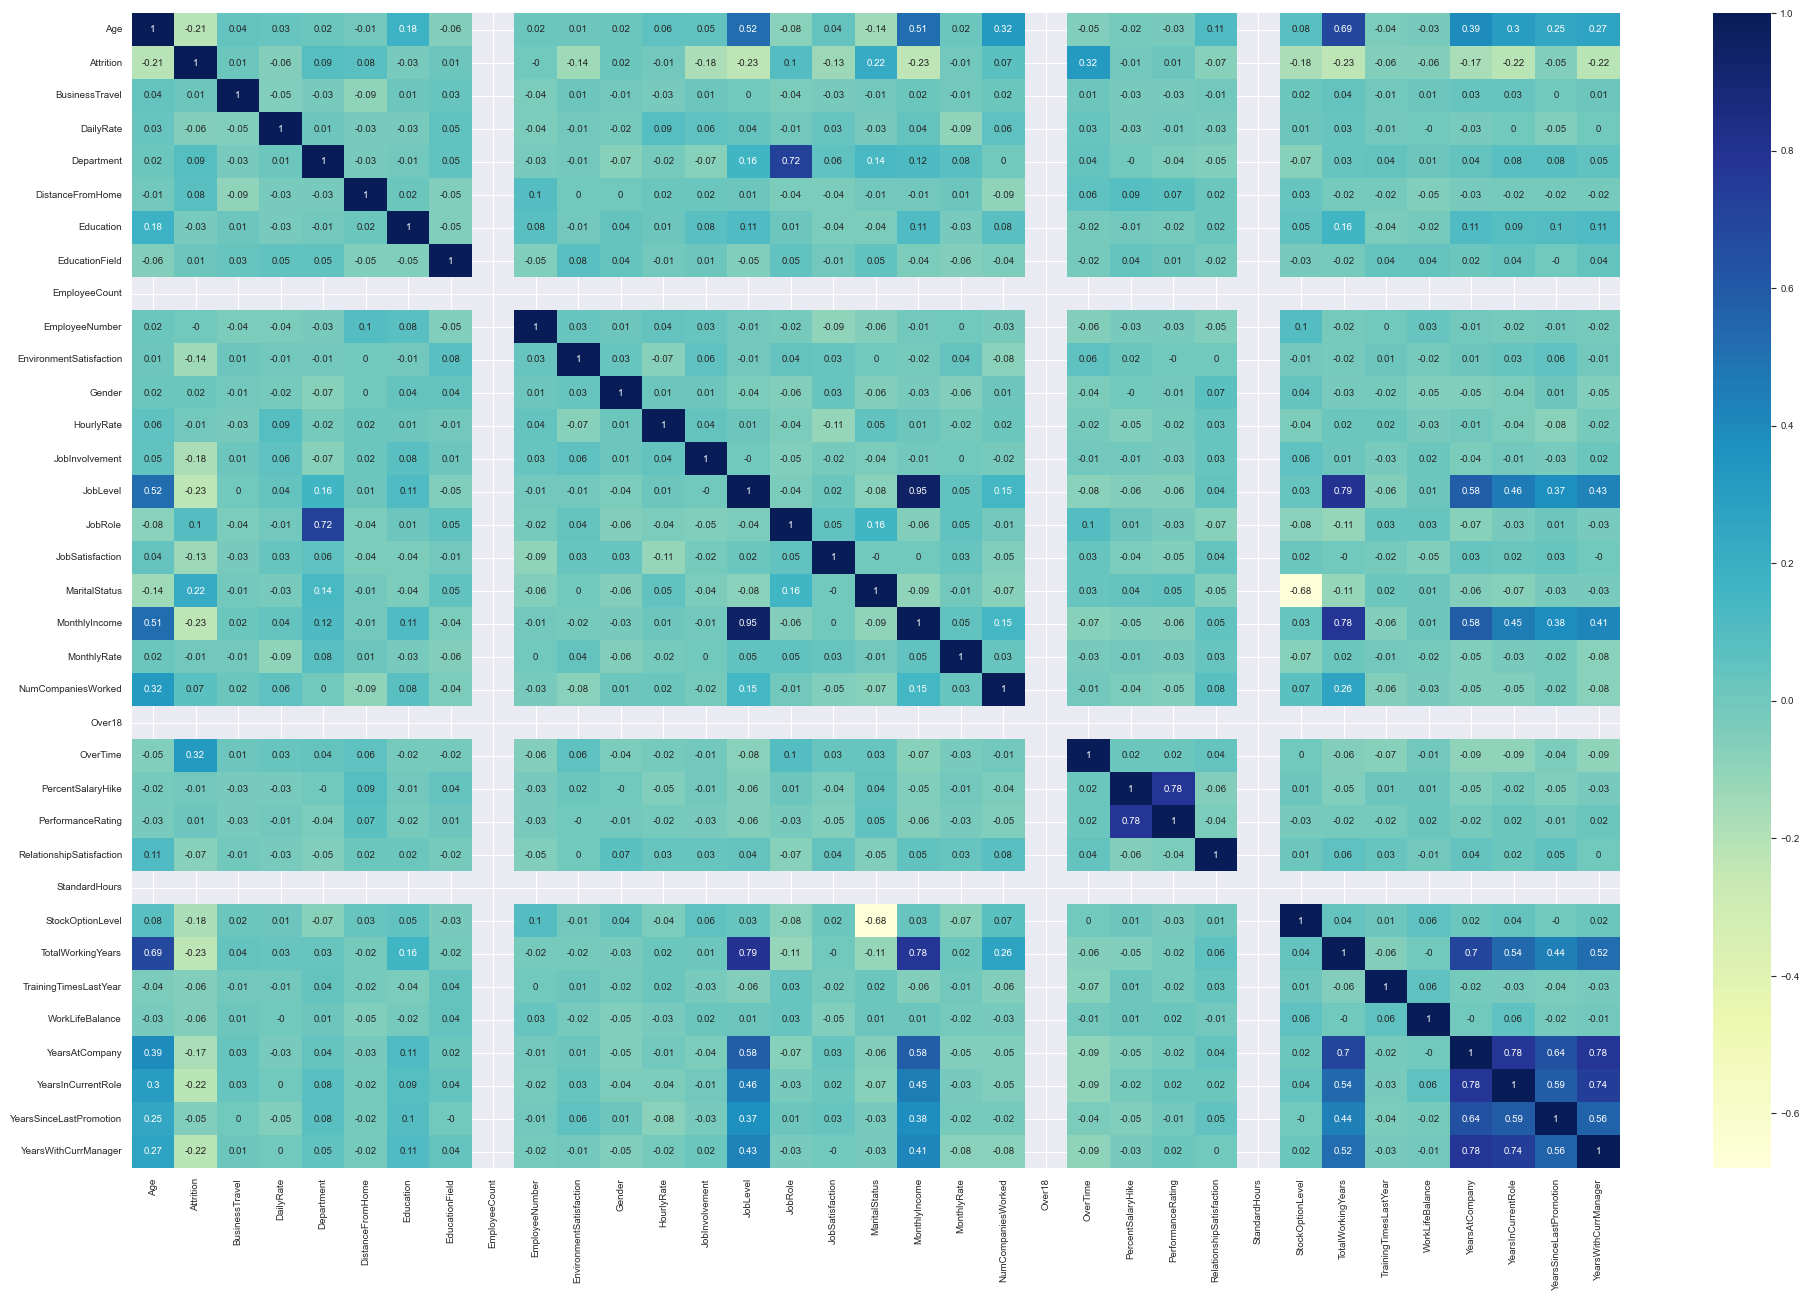

In [24]:
#correlation check
import matplotlib
matplotlib.rcParams.update({'font.size': 7})
plt.figure(figsize= (24,15))
sns.heatmap(np.round(df.corr(),2), annot = True, cmap = 'YlGnBu')

In [25]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

Size of Full Encoded Dataset: (2466, 35)


In [26]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_HR[['Attrition']].copy()
target = df['Attrition'].copy()

In [27]:
type(target)

pandas.core.series.Series

In [28]:
"""

# let's remove the target feature and redundant features from the dataset
df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

"""

"\n\n# let's remove the target feature and redundant features from the dataset\ndf.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',\n            'StandardHours', 'Over18'], axis=1, inplace=True)\nprint('Size of Full dataset is: {}'.format(df.shape))\n\n"

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.357143,1.0,5.0,4.742305,2.5,3.035714,0.00,4.0,0.0,2.230285,...,0.000000,0.0,0.0,0.125,2.500000,1.666667,0.125,0.000000,0.000000,0.000000
1,1.904762,1.0,5.0,2.462419,5.0,4.107143,3.75,3.0,0.0,3.599419,...,3.333333,0.0,0.0,2.000,1.666667,5.000000,1.875,2.500000,3.333333,2.941176
2,4.761905,1.0,5.0,0.658554,2.5,0.178571,3.75,1.0,0.0,1.993227,...,5.000000,0.0,0.0,5.000,1.666667,3.333333,3.875,4.166667,4.333333,2.352941
3,3.333333,1.0,5.0,2.029349,5.0,1.428571,1.25,3.0,0.0,0.283019,...,5.000000,0.0,0.0,1.125,2.500000,3.333333,1.125,2.222222,1.333333,2.058824
4,0.833333,1.0,5.0,2.738010,5.0,3.214286,1.25,2.0,0.0,2.300435,...,3.333333,0.0,5.0,0.125,1.666667,3.333333,0.125,0.000000,0.000000,0.000000


## Feature Selection Methods and  Applications
Ön işlemeden geçirilen veri üzerinde özelik seçimi yapılarak modller uygulanmıştır.

In [30]:

y=df["Attrition"]
X=df.drop("Attrition", axis = 1)


## 1)  Information Gain

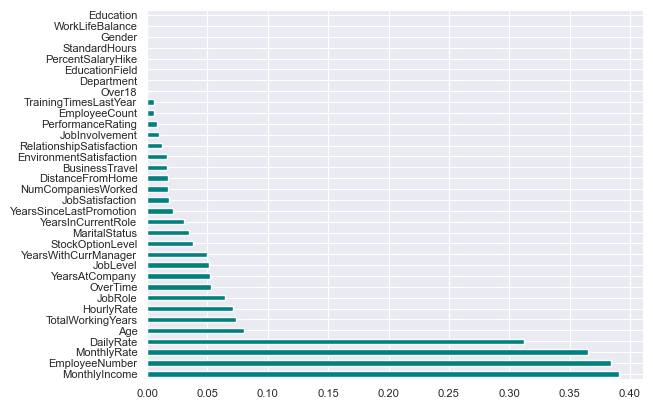

In [31]:
from sklearn.feature_selection import mutual_info_classif
import  matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 8})
%matplotlib inline

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, X.columns)

feat_importances.sort_values(ascending=False).plot(kind = 'barh', color = 'teal')
plt.show()


### 1.1 Selecting the features which are greater than 0.05 score

In [32]:
feat_importances = pd.DataFrame(feat_importances)
X_information_gain = feat_importances[feat_importances[0]>0.05]
X_information_gain = X[X_information_gain.index]
X_information_gain.head()

,Age,DailyRate,EmployeeNumber,HourlyRate,JobLevel,JobRole,MonthlyIncome,MonthlyRate,OverTime,TotalWorkingYears,YearsAtCompany
0,0.357143,4.742305,2.230285,2.500000,0.00,3.750,0.443391,1.360369,0.0,0.125,0.125
1,1.904762,2.462419,3.599419,0.714286,1.25,4.375,0.945234,1.148565,5.0,2.000,1.875
2,4.761905,0.658554,1.993227,0.071429,5.00,3.125,4.801738,4.751456,5.0,5.000,3.875
3,3.333333,2.029349,0.283019,2.428571,2.50,4.375,2.266983,2.309175,0.0,1.125,1.125
4,0.833333,2.738010,2.300435,0.428571,0.00,5.000,0.369668,3.353543,5.0,0.125,0.125


## 2. Feature Selection with VIF value

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


                     feature        VIF
0                        Age   9.217941
1             BusinessTravel   6.871714
2                  DailyRate   3.883729
3                 Department  14.724621
4           DistanceFromHome   2.150387
5                  Education   4.695805
6             EducationField   3.765221
7              EmployeeCount        NaN
8             EmployeeNumber   4.037766
9    EnvironmentSatisfaction   3.069288
10                    Gender   2.535519
11                HourlyRate   4.140836
12            JobInvolvement   5.692624
13                  JobLevel  20.582597
14                   JobRole   9.977970
15           JobSatisfaction   3.164110
16             MaritalStatus   6.636104
17             MonthlyIncome  24.573101
18               MonthlyRate   3.849991
19        NumCompaniesWorked   2.758938
20                    Over18        NaN
21                  OverTime   1.718412
22         PercentSalaryHike   5.982064
23         PerformanceRating   3.136629


## 2.1 Selecting the features that have less then 10 score in VIF

In [34]:
X_VIF = vif_data[vif_data["VIF"] <10]

X_VIF = X[X_VIF['feature']]
X_VIF

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.357143,5.0,4.742305,3.035714,0.00,4.0,2.230285,5.000000,0.0,2.500000,...,0.0,2.857143,0.0,0.000000,0.000000,2.500000,1.666667,0.000000,0.000000,0.000000
1,1.904762,5.0,2.462419,4.107143,3.75,3.0,3.599419,0.000000,0.0,0.714286,...,5.0,4.285714,5.0,3.333333,0.000000,1.666667,5.000000,2.500000,3.333333,2.941176
2,4.761905,5.0,0.658554,0.178571,3.75,1.0,1.993227,5.000000,5.0,0.071429,...,5.0,0.357143,0.0,5.000000,0.000000,1.666667,3.333333,4.166667,4.333333,2.352941
3,3.333333,5.0,2.029349,1.428571,1.25,3.0,0.283019,3.333333,5.0,2.428571,...,0.0,1.785714,0.0,5.000000,0.000000,2.500000,3.333333,2.222222,1.333333,2.058824
4,0.833333,5.0,2.738010,3.214286,1.25,2.0,2.300435,3.333333,5.0,0.428571,...,5.0,2.500000,0.0,3.333333,5.000000,1.666667,3.333333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2.142857,2.5,2.798855,3.928571,1.25,3.0,4.983067,3.333333,5.0,0.785714,...,0.0,2.142857,0.0,3.333333,1.666667,2.500000,3.333333,0.555556,0.000000,0.882353
2462,2.500000,5.0,1.828919,0.892857,0.00,3.0,4.985486,5.000000,5.0,0.857143,...,0.0,1.428571,0.0,0.000000,1.666667,4.166667,3.333333,1.944444,0.333333,2.058824
2463,1.071429,5.0,0.189692,0.535714,2.50,1.0,4.990324,1.666667,5.0,4.071429,...,5.0,3.214286,5.0,1.666667,1.666667,0.000000,3.333333,0.555556,0.000000,0.882353
2464,3.690476,2.5,3.296349,0.178571,2.50,3.0,4.992743,5.000000,5.0,2.357143,...,0.0,1.071429,0.0,5.000000,0.000000,2.500000,1.666667,1.666667,0.000000,2.352941


## 3 Exhaustive Feature Selection

In [120]:

from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier
X_new = X.copy()
efs  = ExhaustiveFeatureSelector(RandomForestClassifier(),
                                 min_features=5,
                                 max_features=6,
                                 scoring = 'roc_auc',
                                 cv = 2)
efs = efs.fit(X_new, y)
selected_features = X_new.columns[list(efs.best_idx_)]
print(selected_features)
print(efs.best_score_)

KeyboardInterrupt: 

## 3.1 Feature Selection based on Exhaustive Feature Selection

In [ ]:
X_exhaustive_model = X[selected_features]

## 5.Verilerin İşlenmesi



## 5.1 Random Forest Application with features selected from Information Gain
 X becomes X_information_gain

In [35]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_information_gain,y,test_size=1/3,random_state=42, stratify=y, shuffle=True)

## RandomForest with best parameters and evaluation

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.

Text(0.5, 27.52222222222222, 'Predicted label')

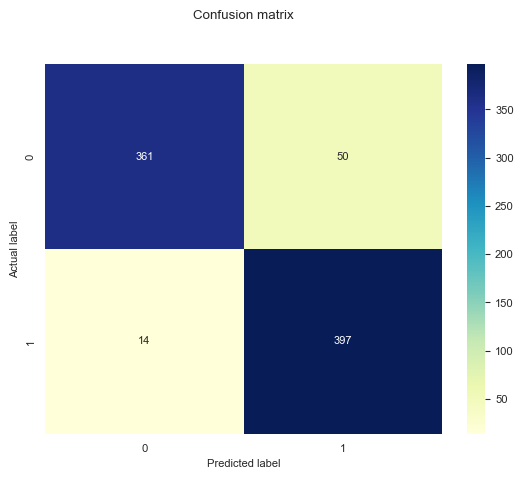

In [36]:
### Apply Random Forest model
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clssfr = RandomForestClassifier(random_state = 2)

parameters = {

 'max_depth': np.arange(4,10),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3],
 'n_estimators': [100,  300]

}

clssfr_cv= GridSearchCV(clssfr, parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

## accuracy scores
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

## F1 scores
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Creating a Heatmap for the confusion matrix.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 5.2 Random Forest Application with features selected from VIF

In [117]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_VIF,y,test_size=1/3,random_state=42, stratify=y, shuffle=True)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.

Text(0.5, 27.52222222222222, 'Predicted label')

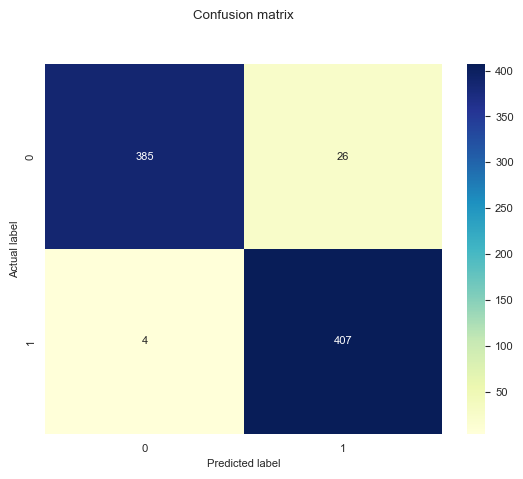

In [118]:
### Apply Random Forest model

from sklearn.ensemble import RandomForestClassifier
clssfr = RandomForestClassifier(random_state = 2)

parameters = {

 'max_depth': np.arange(4,10),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3],
 'n_estimators': [100,  300]

}

clssfr_cv= GridSearchCV(clssfr, parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

## accuracy scores
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

## F1 scores
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Creating a Heatmap for the confusion matrix.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 5.3 Random Forest Application with features selected from Exhaustive Feature Selection


In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_exhaustive_model,y,test_size=1/3,random_state=42, stratify=y, shuffle=True)

In [ ]:
### Apply Random Forest model

from sklearn.ensemble import RandomForestClassifier
clssfr = RandomForestClassifier(random_state = 2)

parameters = {

 'max_depth': np.arange(4,10),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3],
 'n_estimators': [100,  300]

}

clssfr_cv= GridSearchCV(clssfr, parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

## accuracy scores
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

## F1 scores
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Creating a Heatmap for the confusion matrix.
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')